# Week 6 スライド

## NumPy Matrix

In [1]:
#---- week06/prepare
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(100)   # 100 は乱数の種

A = rng.choice(range(20), size=(3, 3))
A

B = rng.normal(size=(3,3))
B

x = rng.choice(range(10), 3)
x

array([9, 5, 5])

In [2]:
#---- week06/matrix-arithmetic/dnr
A + B
A - B
A @ B
A @ x

array([225, 129, 127])

In [3]:
#---- week06/matrix-arithmetic-quiz/dnr
A * B
A / B
A + x

array([[24, 21,  7],
       [20,  6, 10],
       [17,  5, 16]])

In [4]:
#---- week06/matrix-arithmetic-avoid-pitfall
x.shape = (3, 1)
A @ x

array([[225],
       [129],
       [127]])

In [5]:
#---- week06/ts-representation
Y = np.arange(9)
Y.shape = (3, 3, 1)
Y

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])

In [6]:
#---- week06/ts-representation-2
Y[0]
Y[1]

array([[3],
       [4],
       [5]])

In [7]:
#---- week06/ts-representation-transform/dnr
X = Y.squeeze()
X
X.shape = (*X.shape, 1)
X

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])

In [8]:
#---- week06/ar2
A = np.array([[0.6, 0.3],
              [1.0, 0.0]])
B = np.array([[1.0],
              [0.0]])
C = np.array([[1.0, 0.0]])

In [9]:
#---- week06/ar2-stability
E, V = np.linalg.eig(A)
np.abs(E)
np.linalg.matrix_power(A, 200)

array([[1.12385121e-07, 3.64689491e-08],
       [1.21563164e-07, 3.94472223e-08]])

In [10]:
#---- week06/ar2-sim
T = 100
x, y = np.empty((T, 2, 1)), np.empty((T, 1, 1))
rng = np.random.default_rng(123)
eps = rng.normal(loc=0, scale=0.3, size=(T, 1, 1))

x[0] = np.array([[0.0],
                 [0.0]])
y[0] = np.array([[0.0]])

for t in range(1, T):
    x[t] = A @ x[t-1] + B @ eps[t]
    y[t] = C @ x[t]

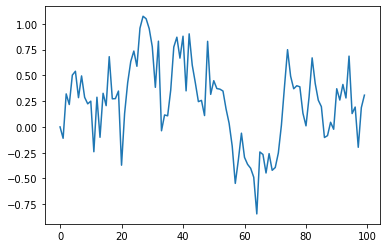

In [11]:
#---- week06/ar2-sim/plot
plt.plot(y.squeeze())
plt.show()

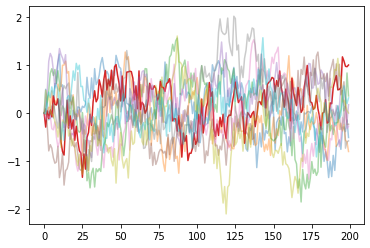

In [12]:
#---- week06/ar2-many-sim/plot
for i in range(10):
    T = 200 
    x, y = np.empty((T, 2, 1)), np.empty((T, 1, 1))
    eps = rng.normal(loc=0, scale=0.3, size=(T, 1, 1))
    x[0] = np.array([[0.0], [0.0]])
    y[0] = np.array([[0.0]])

    for t in range(1, T):
        x[t] = A @ x[t-1] + B @ eps[t]
        y[t] = C @ x[t]
        
    plt.plot(y.squeeze(), alpha=(1 if i==3 else 0.4))
    
plt.show()

In [13]:
#---- END